In [28]:
import pandas as pd

In [29]:
ddf= pd.read_csv('C:/Users/Pc/Desktop/Máster/Data Science (Pontia)/Proyecto Jupyter/Csv/DDF.csv', sep='|')

In [30]:
ddf.head()

,monto,es_fraude,balance_prev_or,balance_prev_des,hora,tipo_binario
0,181.00,1,181.0,0.0,7,1
1,181.00,1,181.0,21182.0,7,0
2,229133.94,0,15325.0,5083.0,7,0
3,215310.30,0,705.0,22425.0,7,1
4,311685.89,0,10835.0,6267.0,7,1


In [31]:
ddf.shape

(2770360, 6)

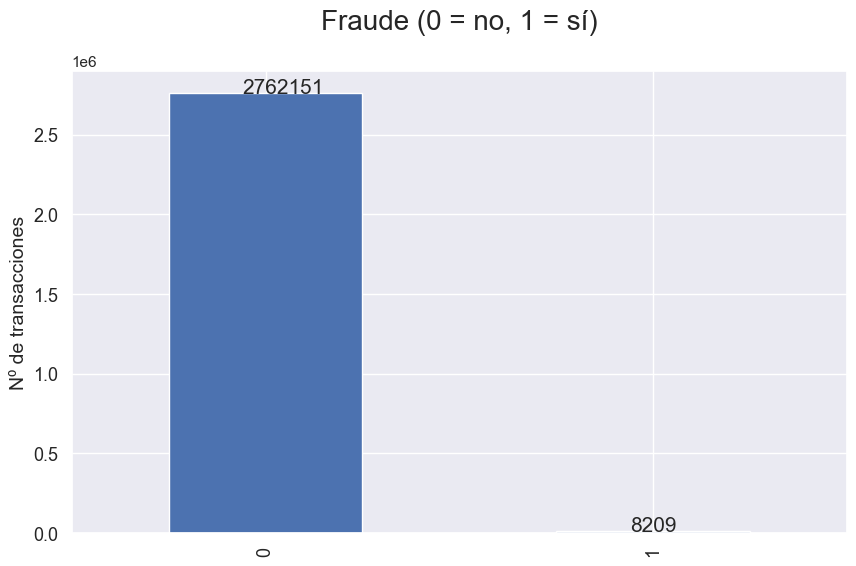

In [32]:
ax = ddf['es_fraude'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_title('Fraude (0 = no, 1 = sí)', size=20, pad=30)
ax.set_ylabel('Nº de transacciones', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(),2)), fontsize=15)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(14,12)})

# Para suprimir los warnings de scikitlearn por convergencia prematura
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.preprocessing import RobustScaler

In [34]:
X = ddf[['monto','balance_prev_or','balance_prev_des', 'hora','tipo_binario']]
y = ddf[['es_fraude']]

In [35]:
X.head()

,monto,balance_prev_or,balance_prev_des,hora,tipo_binario
0,181.00,181.0,0.0,7,1
1,181.00,181.0,21182.0,7,0
2,229133.94,15325.0,5083.0,7,0
3,215310.30,705.0,22425.0,7,1
4,311685.89,10835.0,6267.0,7,1


In [36]:
y.head()

,es_fraude
0,1
1,1
2,0
3,0
4,0


In [37]:
y.value_counts()

es_fraude
0            2762151
1               8209
dtype: int64

In [ ]:
# Como vemos los datos están muy desbalanceados, el porcentaje de transacciones fraudulentas es tan solo un 0,3% del total.
# Vamos a balancearlos empleando SMOTE, haciendo que sean un 50% de la muestra.

In [39]:
from imblearn.over_sampling import SMOTE
'''generar muestras sintéticas adicionales de la clase minoritaria para equilibrar la distribución de clases en 
el conjunto de datos.'''
smote = SMOTE(sampling_strategy='minority') 
'''actualiza X e y con las muestras sintéticas generadas para abordar el problema de desequilibrio de clases en el
conjunto de datos.'''
X, y = smote.fit_resample(X, y)

In [40]:
y.value_counts()

es_fraude
0            2762151
1            2762151
dtype: int64

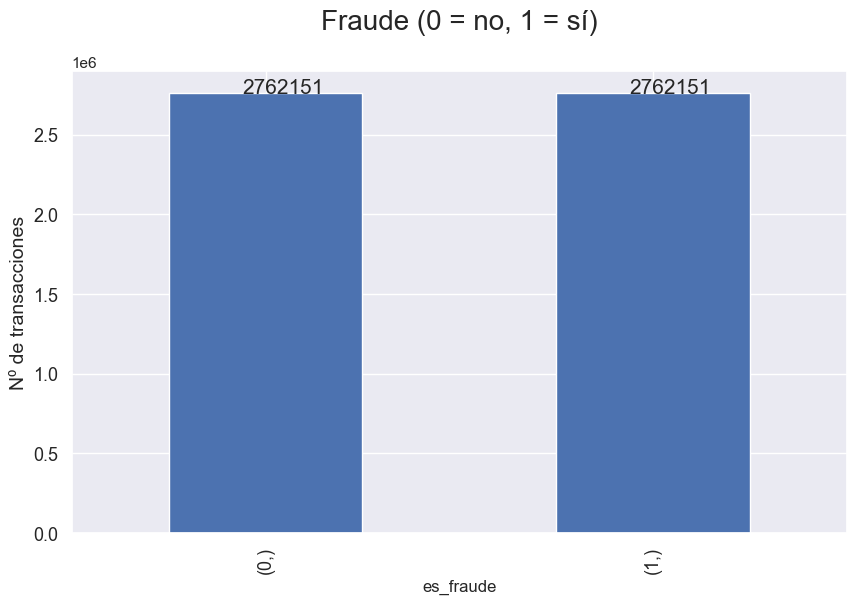

In [41]:
ax = y.value_counts().plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_title('Fraude (0 = no, 1 = sí)', size=20, pad=30)
ax.set_ylabel('Nº de transacciones', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(),2)), fontsize=15)

In [42]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3867011, 5)
(3867011, 1)
(1657291, 5)
(1657291, 1)


In [43]:
mean = X_train.mean(axis=0)

In [44]:
median = X_train.median(axis=0)

In [45]:
pd.concat([mean, median, mean-median], axis=1, keys=["Media", "Mediana", "Diferencia"])

,Media,Mediana,Diferencia
monto,8.899945e+05,233103.51,656890.977935
balance_prev_or,8.436020e+05,65325.00,778277.039842
balance_prev_des,1.115449e+06,134381.83,981067.261238
hora,1.189442e+01,13.00,-1.105584
tipo_binario,2.846242e-01,0.00,0.284624


In [46]:
#Obtener 1.5 el rango intercuartílico
iqrx15 = (X_train.quantile(.75) - X_train.quantile(.25))*1.5
#Obtener los valores máximos
maxs = X_train.max()
#Obtener los valores mínimos
mins = X_train.min()
#Definir un límite superior igual a la mediana mas 1.5 veces el rango intercuartílico
sup = median + iqrx15
#Definir un límite inferior igual a la mediana menos 1.5 veces el rango intercuartílico
inf = median - iqrx15
#Comprobar si los valores máximos están más allá del límite superior
out_sup = maxs > inf
#Comprobar si los valores mínimos están más allá del límite inferior
out_inf = maxs < inf
#Mostramos para qué variables existen valores atípicos
pd.concat([out_sup, out_inf], axis=1, keys=["Outlier Sup", "Outlier Inf"])

,Outlier Sup,Outlier Inf
monto,True,False
balance_prev_or,True,False
balance_prev_des,True,False
hora,True,False
tipo_binario,True,False


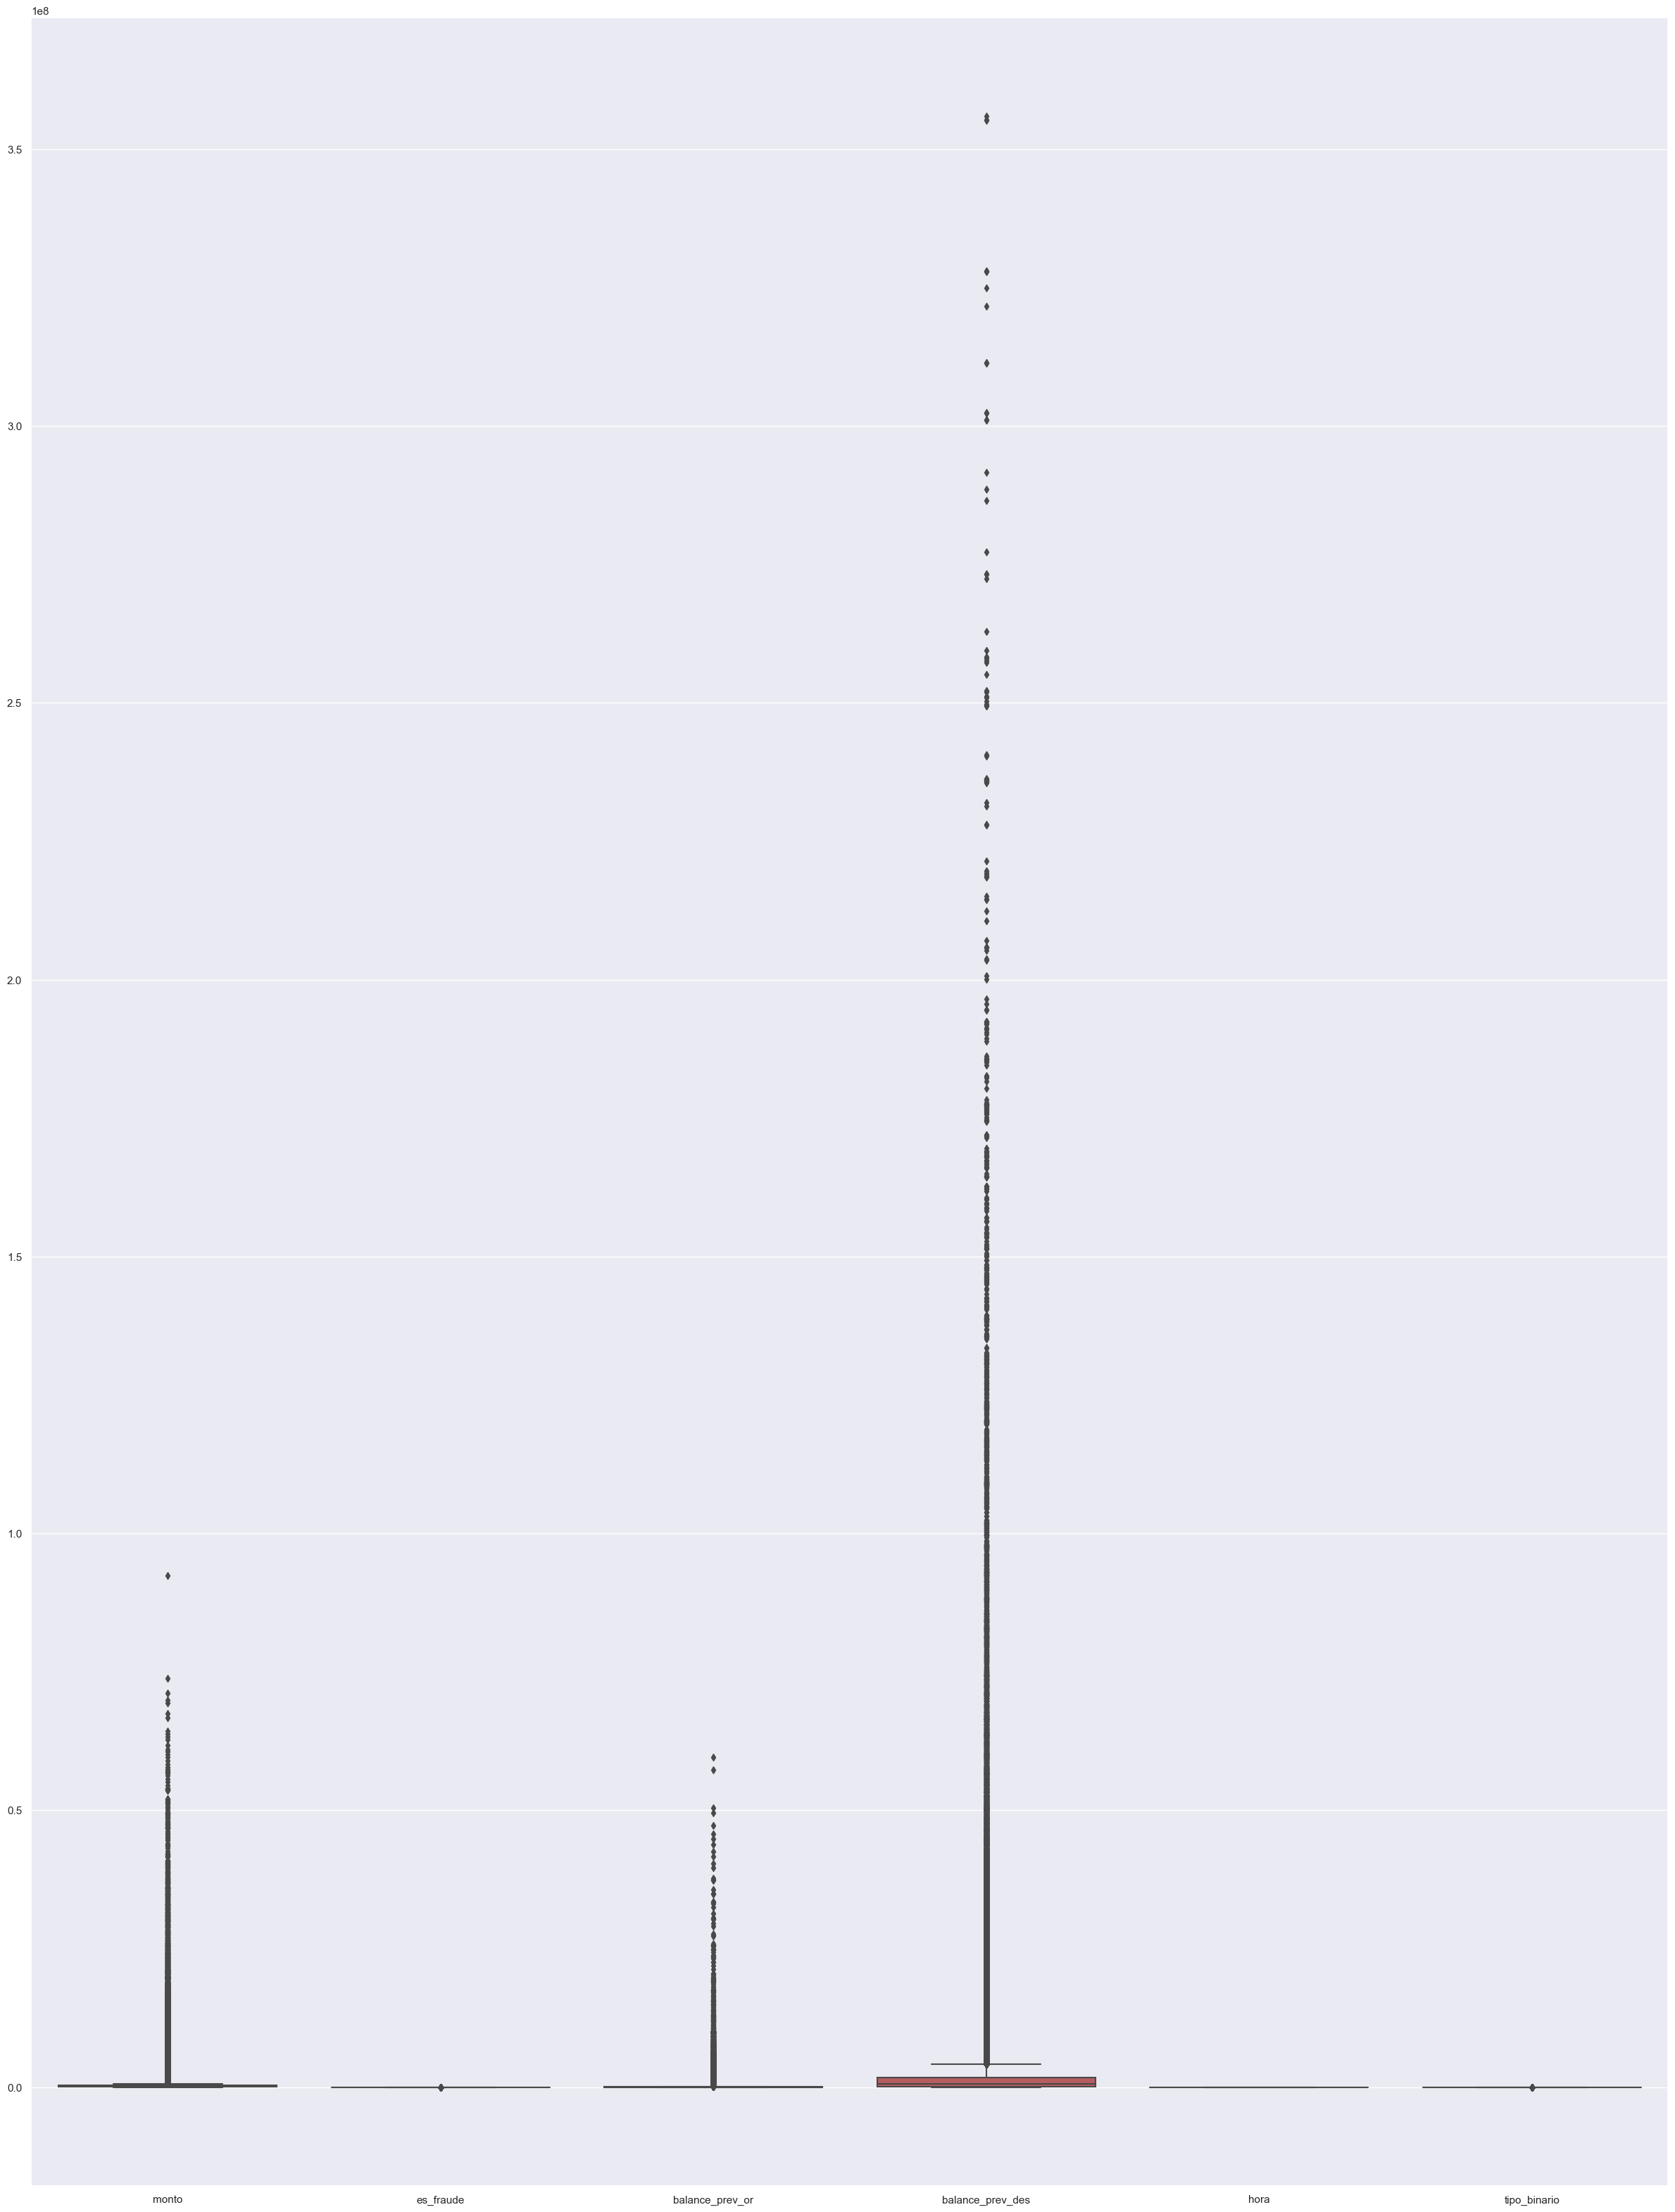

In [47]:
plt.figure(figsize = (30,40))
sns.boxplot(data = ddf)
plt.show()

In [48]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Normalizar los datos
scaler = RobustScaler()  # Definir el modelo de normalización
X_train = pd.DataFrame(scaler.fit_transform(X_train))  # Entrenar y normalizar los datos de entrenamiento, ajustamos parámetros
X_test = pd.DataFrame(scaler.transform(X_test))  # Normalizar los datos de prueba

# Comprobar el resultado de la normalización
result = pd.concat([X_train.median(), X_test.median(),
                    (X_train.quantile(0.75) - X_train.quantile(0.25)),
                    (X_test.quantile(0.75) - X_test.quantile(0.25))],
                   axis=1,
                   keys=["Train median", "Test median", "Train iqr", "Test iqr"])
print(result)

   Train median  Test median  Train iqr  Test iqr
0           0.0     0.001100        1.0  1.005139
1           0.0     0.000760        1.0  1.006873
2           0.0    -0.000568        1.0  1.001803
3           0.0     0.000000        1.0  1.000000
4           0.0     0.000000        1.0  1.000000


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [50]:
#definir y entrenar el modelo de regresion logistica
l_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
# obtener las predicciones para el conjunto de datos de testeo
y_est = l_reg.predict(X_test)

In [52]:
precision = precision_score(y_test, y_est)  # Cuánto acierta el modelo cuando dice que una transacción es fraudulenta
recall = recall_score(y_test, y_est)  # Cuántas de las transacciones fraudulentas detecta bien
print('precision: ' + str(precision))
print('recall: ' + str(recall))

precision: 0.8983268694847465
recall: 0.8216123085529782


Confusion matrix
[[750757  77127]
 [147956 681451]]
Normalized confusion matrix
[[0.9068384  0.0931616 ]
 [0.17838769 0.82161231]]


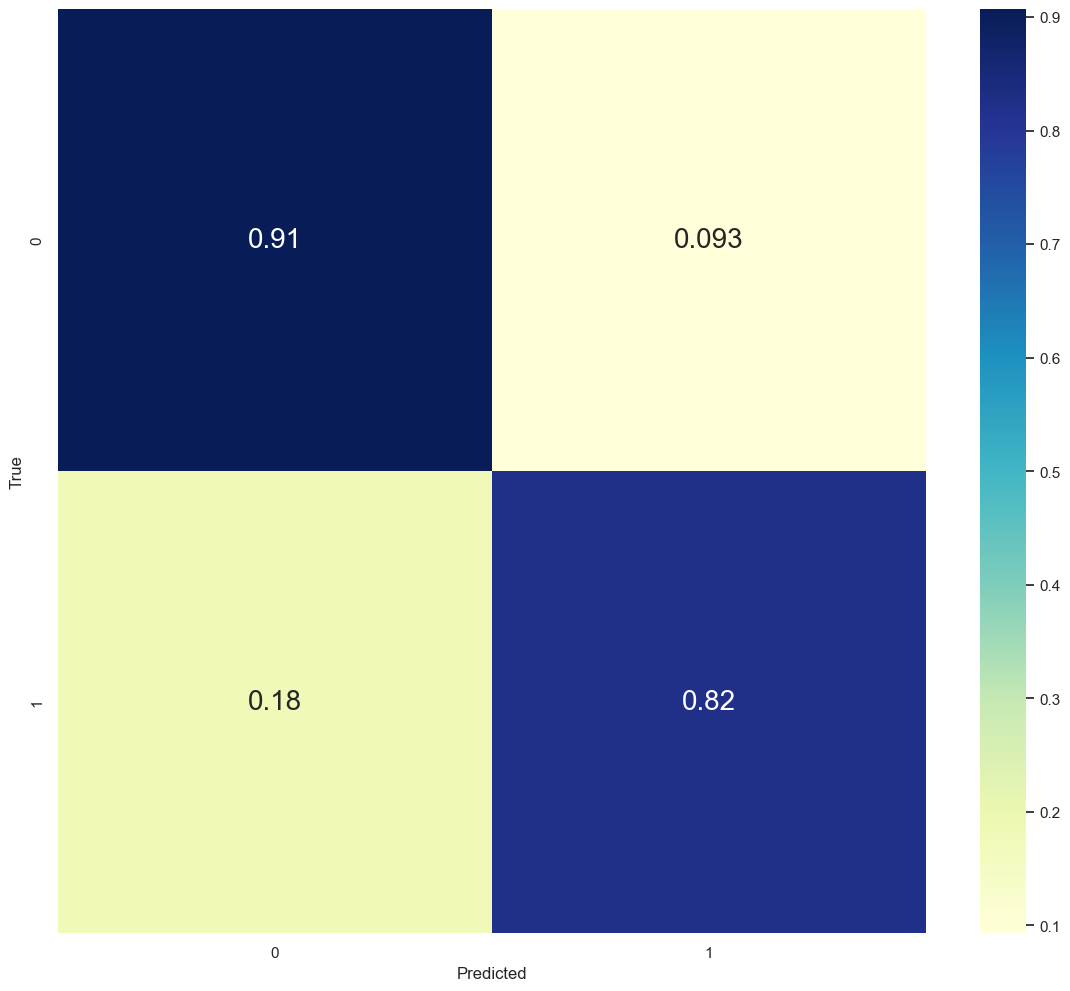

In [53]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

In [ ]:
# Vemos que cuando la transacción no es fraudulenta, acierta un 91% de veces, mientras que cuando sí lo es, acierta un 82%

In [54]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

import pandas as pd
from sklearn.preprocessing import RobustScaler

# Normalizar los datos. Usamos robust para un mejor tratamiento de los outliers.
scaler = RobustScaler()  # Definir el modelo de normalización
X_train = pd.DataFrame(scaler.fit_transform(X_train))  # Entrenar y normalizar los datos de entrenamiento, ajustamos parámetros
X_test = pd.DataFrame(scaler.transform(X_test)) 

clf_tree = DecisionTreeClassifier(criterion= 'gini')
clf_tree.fit(X_train, y_train)

y_est = clf_tree.predict(X_test)


In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [56]:
precision = precision_score(y_test, y_est)
recall = recall_score(y_test, y_est)
print('precision: ' + str(precision))
print('recall: ' + str(recall))

precision: 0.9966381050086456
recall: 0.9989065867887685


Confusion matrix
[[825901   2792]
 [   906 827692]]
Normalized confusion matrix
[[0.99663084 0.00336916]
 [0.00109341 0.99890659]]


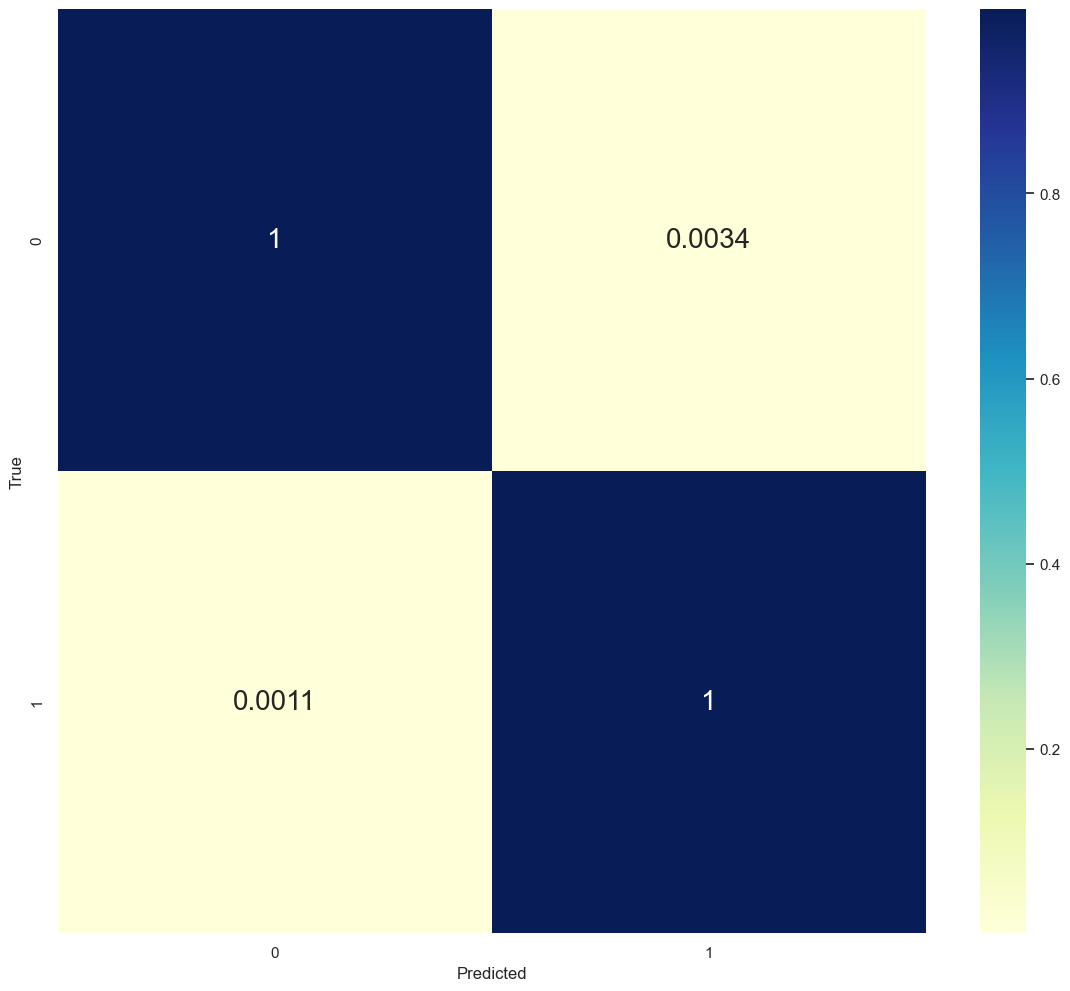

In [57]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

In [ ]:
# Vemos que el árbol funciona muy bien. Tanto cuando el modelo cataloga una transacción como fraudulenta como cuando no, 
# acierta casi en el total de los casos

In [58]:
ddf.shape

(2770360, 6)

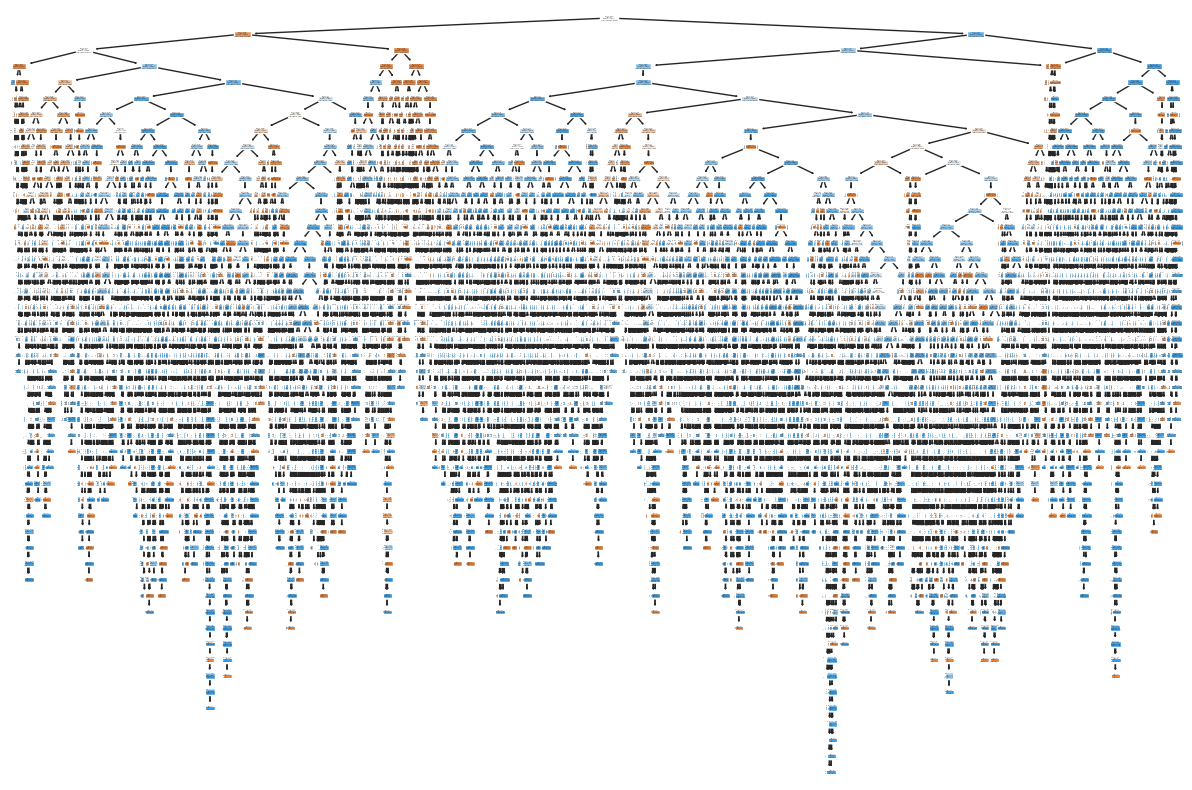

In [60]:
plt.figure(figsize=(15, 10))
plot_tree(clf_tree, filled=True)
plt.show()